In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pickle

In [4]:
df  = pd.read_csv("/content/drive/MyDrive/Impact_of_Digital_Banking_Adoption_On_Customer/bank-additional-full.csv",sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.shape

(41188, 21)

In [6]:
## Check missing values
print('Missing  values:\n', df.isnull().sum())

## Replacing unknown to NaN for easier handling
df.replace('unknown',np.nan,inplace = True)



Missing  values:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [7]:
(df.isnull().sum() / df.shape[0]) * 100

,0
age,0.000000
job,0.801204
marital,0.194231
education,4.202680
default,20.872584
housing,2.403613
loan,2.403613
contact,0.000000
month,0.000000
day_of_week,0.000000


In [8]:
df.shape[0]


41188

In [9]:
df['default'] = df['default'].ffill()

In [10]:
df.dropna(inplace=True)

In [11]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000
mean,39.860871,258.207583,2.566662,963.531651,0.170009,0.082861,93.570313,-40.541164,3.623298,5167.432566
std,10.289488,259.792638,2.767473,184.295254,0.487169,1.565945,0.576367,4.623200,1.730226,71.760333
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
df['age'].value_counts()

,count
age,
31,1858
32,1757
33,1742
36,1678
35,1654
...,...
91,2
98,2
95,1


In [13]:
df['job'].value_counts()

,count
job,
admin.,9937
blue-collar,8560
technician,6380
services,3716
management,2728
retired,1577
entrepreneur,1360
self-employed,1349
housemaid,987


In [14]:
df.duplicated().sum()
# df.duplicated().sum()

np.int64(13)

In [15]:
df = df.drop_duplicates()

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.shape

(38232, 21)

In [18]:
df['y'] = df['y'].map({'yes':1,'no':0})

In [19]:
## Encode categorical features
df_encoded = pd.get_dummies(df , drop_first = True)


In [20]:
## Confirm Shape
df_encoded.shape

(38232, 48)

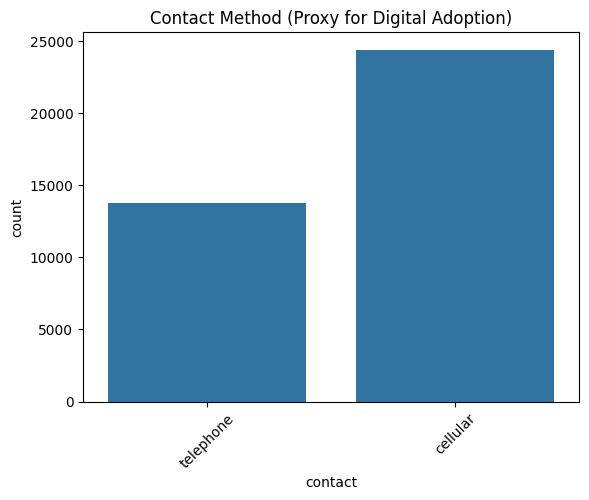

In [21]:
sns.countplot(data=df, x='contact')
plt.title('Contact Method (Proxy for Digital Adoption)')
plt.xticks(rotation=45)
plt.savefig("/content/drive/MyDrive/Impact_of_Digital_Banking_Adoption_On_Customer/contact_plot.png", dpi=300, bbox_inches='tight')
plt.show()

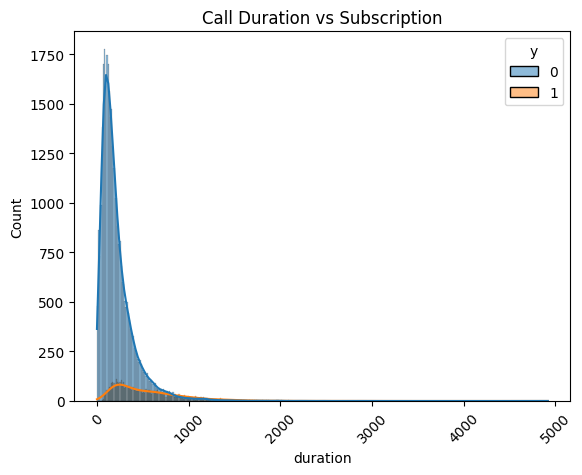

In [22]:
sns.histplot(data=df,x='duration',hue='y',kde=True)
plt.title('Call Duration vs Subscription')
plt.xticks(rotation=45)
plt.savefig("/content/drive/MyDrive/Impact_of_Digital_Banking_Adoption_On_Customer/call duration vs Sunscription.png", dpi=300, bbox_inches='tight')
plt.show()

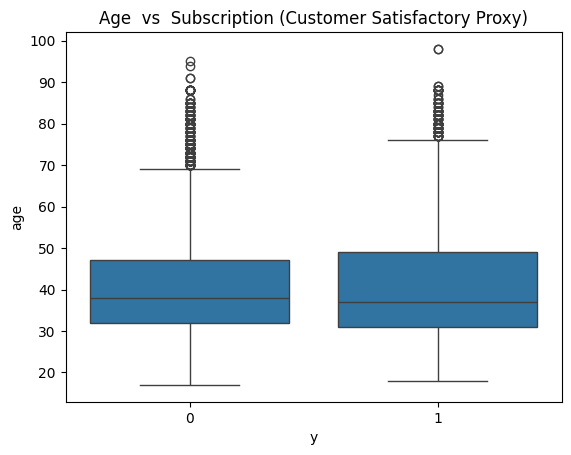

In [23]:
sns.boxplot(data=df , x='y' , y='age')
plt.title('Age  vs  Subscription (Customer Satisfactory Proxy)')
# plt.xticks(rotation = 45)
plt.savefig('/content/drive/MyDrive/Impact_of_Digital_Banking_Adoption_On_Customer/Box plot of Age  vs  Subscription (Customer Satisfactory Proxy)')
plt.show()

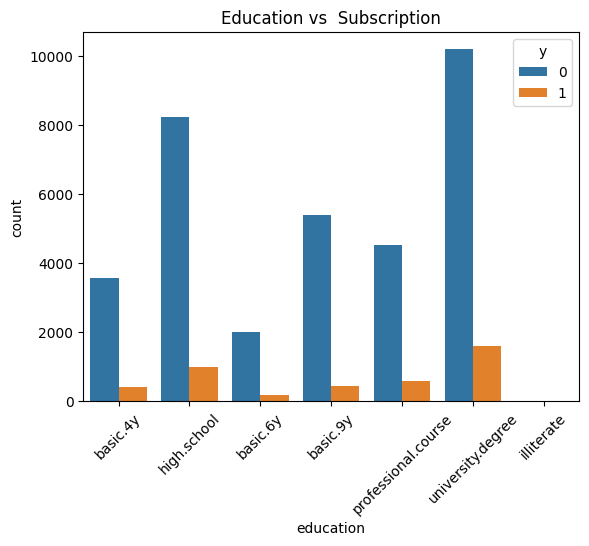

In [24]:
sns.countplot(data=df, x='education' , hue = 'y')
plt.title('Education vs  Subscription')
plt.xticks(rotation = 45 )
plt.savefig('/content/drive/MyDrive/Impact_of_Digital_Banking_Adoption_On_Customer/Categorywise Education vs Subscription plot')
plt.show()

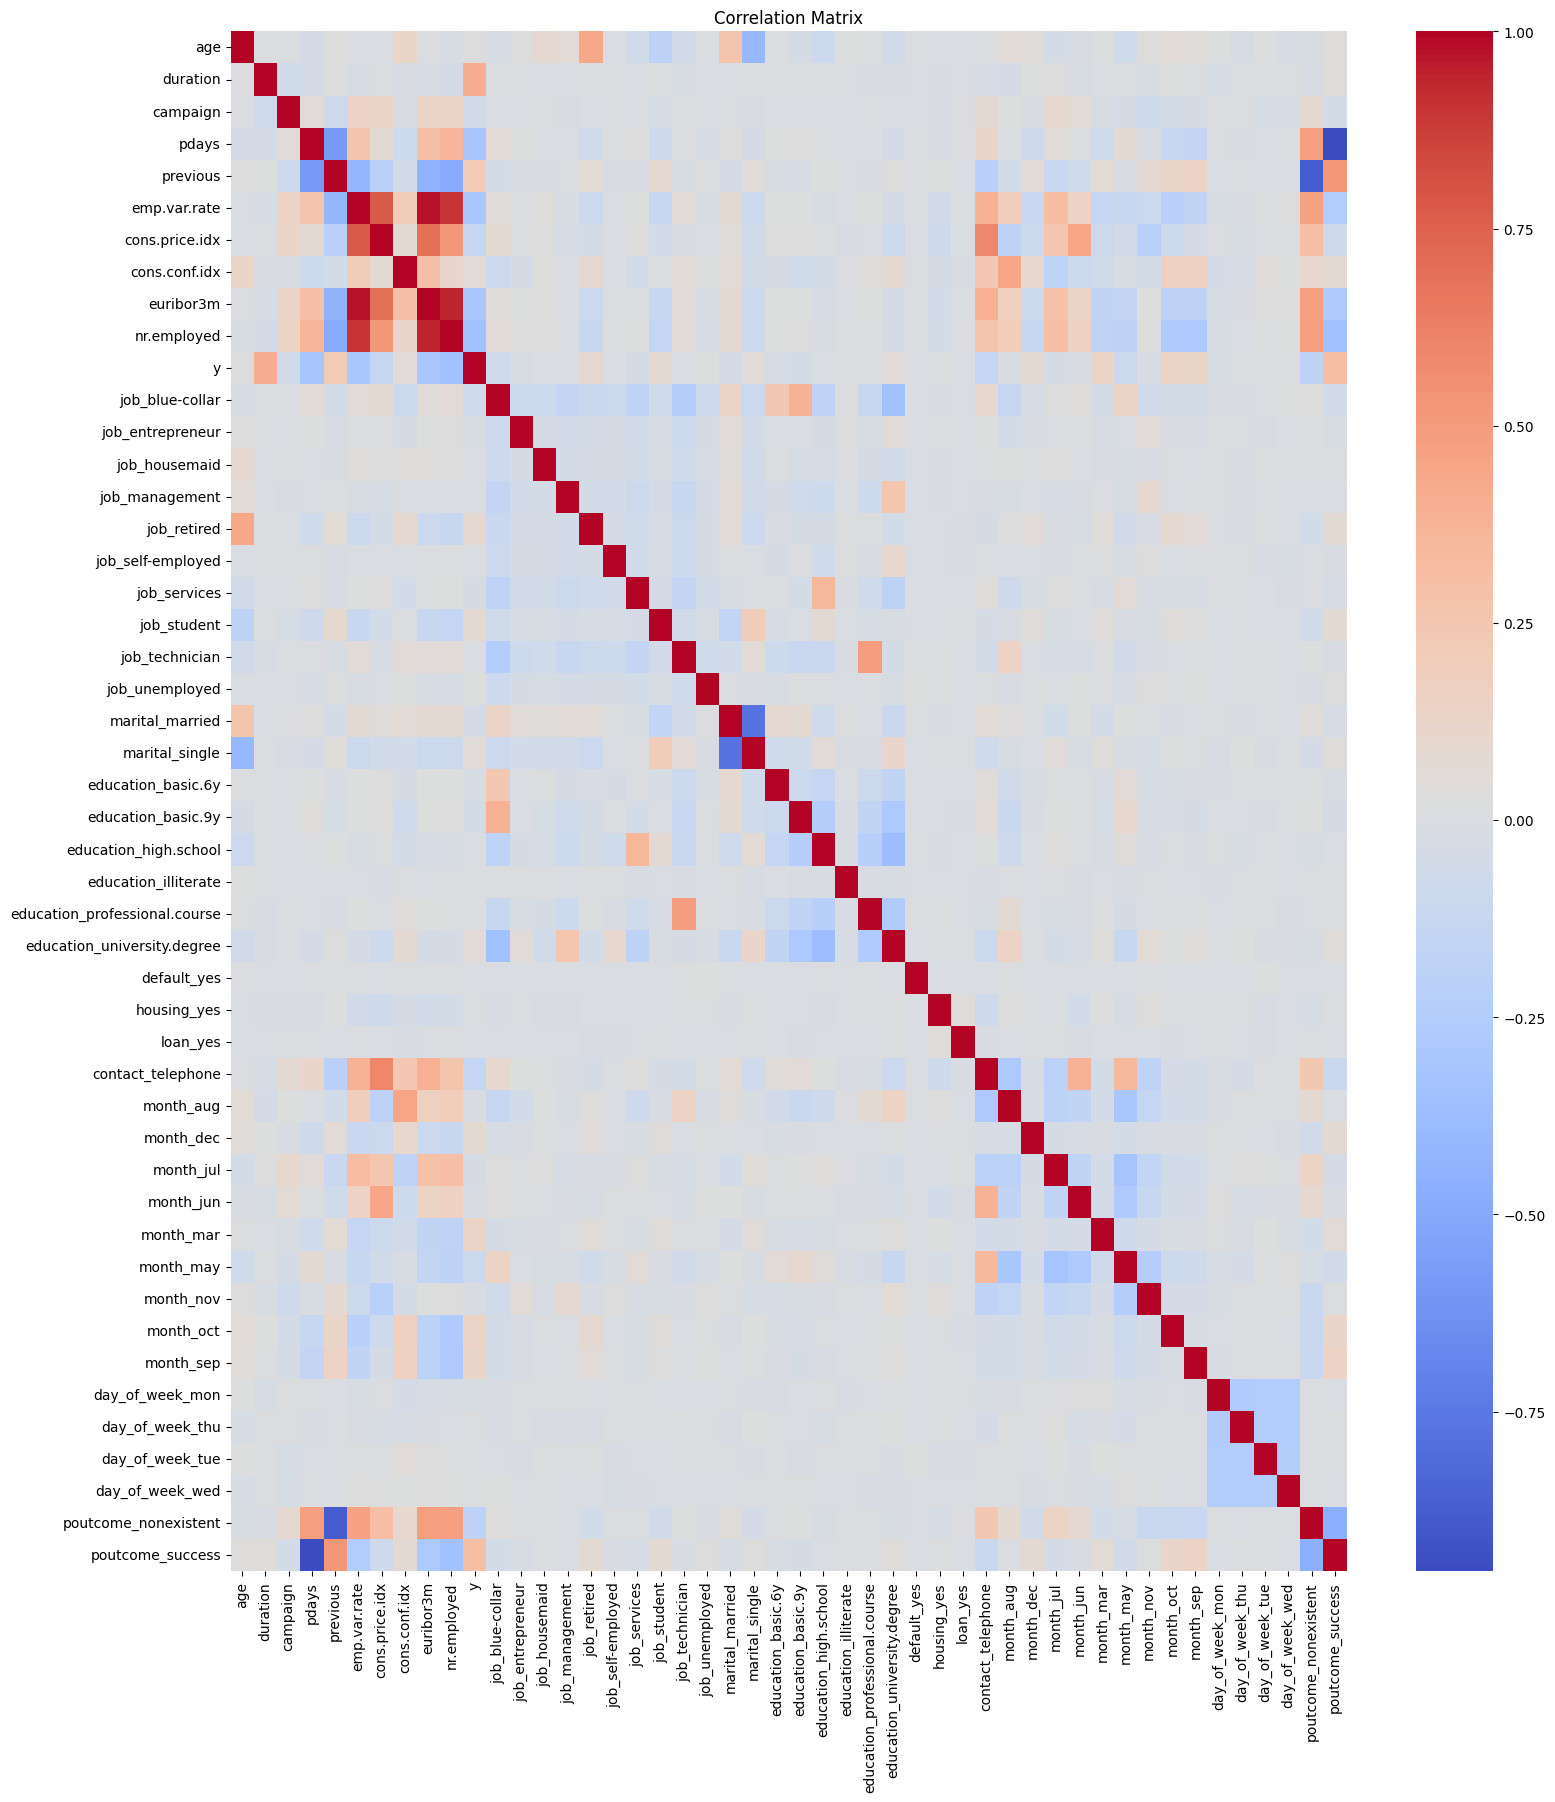

In [25]:
## Corrrelation matrix
corr =  df_encoded.corr()
plt.figure(figsize=(18 , 20))
sns.heatmap(corr , cmap='coolwarm',annot = False)
plt.title('Correlation Matrix')
plt.savefig('/content/drive/MyDrive/Impact_of_Digital_Banking_Adoption_On_Customer/Heatmap')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , confusion_matrix



In [27]:
## Split data into dependent and independent
x  = df_encoded.drop('y',axis=1)
y = df_encoded['y']

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state= 42)

In [29]:
## Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr

LogisticRegression(max_iter=1000)

In [30]:
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [31]:
y_pred_lr = lr.predict(x_test)

In [32]:
## Random forest
rf =  RandomForestClassifier(n_estimators=1000,random_state=42)
rf

RandomForestClassifier(n_estimators=1000, random_state=42)

In [33]:
rf.fit(x_train,y_train)


RandomForestClassifier(n_estimators=1000, random_state=42)

In [34]:
y_pred_rf = rf.predict(x_test)


In [37]:
import pickle

with open('/content/drive/MyDrive/Impact_of_Digital_Banking_Adoption_On_Customer/logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(lr, f)

In [38]:
with open('/content/drive/MyDrive/Impact_of_Digital_Banking_Adoption_On_Customer/random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf, f)